# Kaggle Amazon Employee Access Challenge
### https://www.kaggle.com/c/amazon-employee-access-challenge

#### Code Author: Wenyang Fu
#### First started on: 3/19/2016
#### Python version: 3.5


# What's the point of this competition?
### Amazon wants to predict whether employees should be granted access to some resources (e.g. cloud storage in Amazon S3 buckets, cloud compute with EC2, web hosting on AWS) based on their role at work, along with other variables.


In [2]:
import numpy as np
import pandas as pd
import sklearn.cross_validation
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import display, HTML

%matplotlib inline

In [6]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv', index_col='id')

display(train.head(5))

# Break the training data into a target ("dependent") and inputs ("inpedendents")
y_train = train.ACTION
X_train = train.drop(["ACTION"], axis=1)
print("Number of instances:{}".format(len(train.index)))


,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325


Number of instances:32769


### Let's visualize our data to get a better idea of our problem.

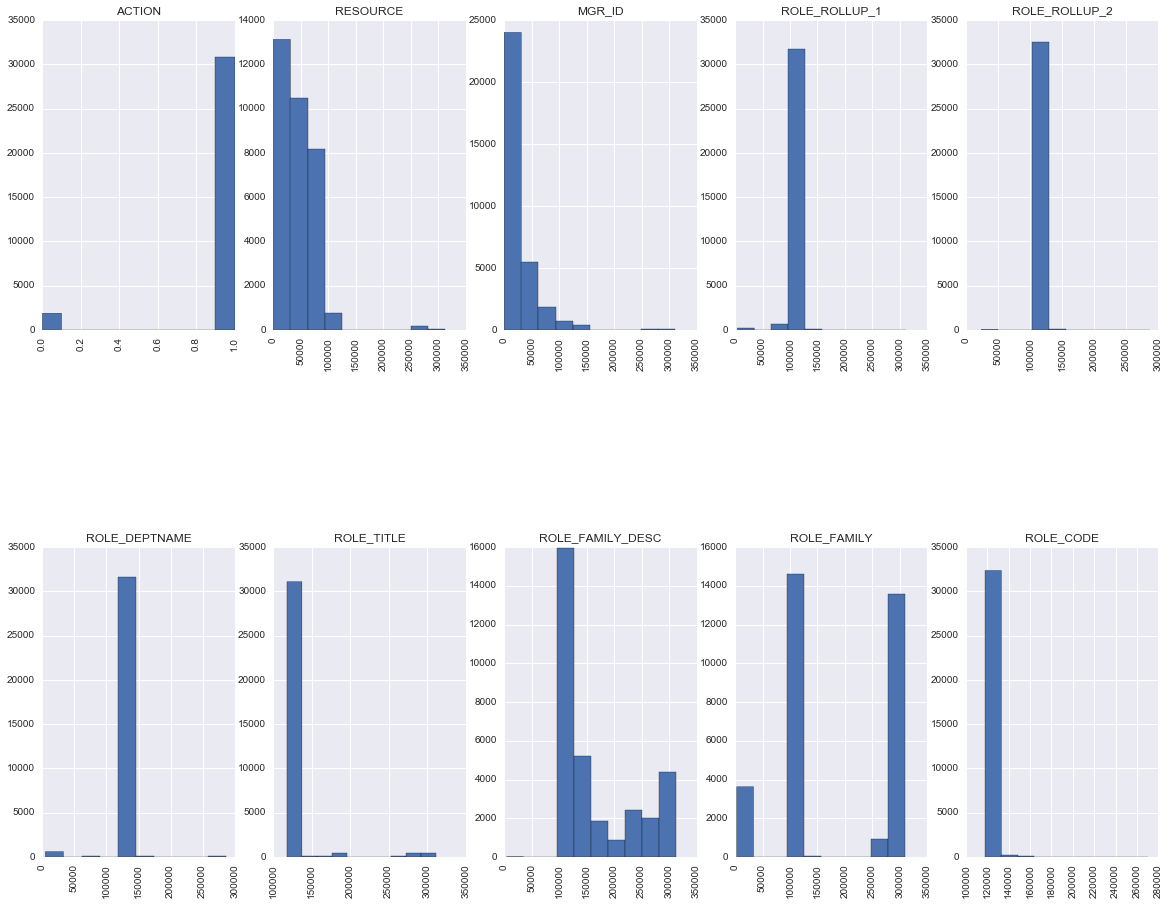

In [7]:
def show_feature_dist(df):
    """ Plot the distribution for each feature. """
    fig = plt.figure(figsize=(20, 15))
    cols = 5
    rows = np.ceil(float(df.shape[1]) / cols)
    for i, column in enumerate(df.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if df.dtypes[column] == np.object:
            df[column].value_counts().plot(
                kind="bar", axes=ax)
        else:
            df[column].hist(axes=ax)
            plt.xticks(rotation="vertical")
    plt.subplots_adjust(hspace=0.7, wspace=0.2)
    plt.show()

show_feature_dist(train)

### Well, it looks like we have a very lopsided classification problem here. Out of 32769 instances, a little more than 30000 employees are allowed access, while less than 2500 are denied access. Let's take a closer look:

Number of approved resources: 30872
Number of rejected resources: 1897
Fraction of rejects: 0.05789007903811529


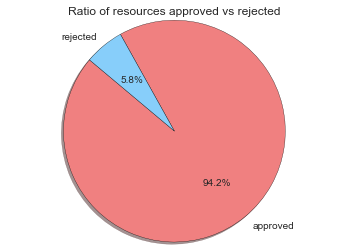

In [8]:
num_approvals = len(y_train[y_train == 1])
num_rejects = len(y_train[y_train == 0])
total = num_approvals + num_rejects

print("Number of approved resources: {}".format(num_approvals))
print("Number of rejected resources: {}".format(num_rejects))
print("Fraction of rejects: {}".format(num_rejects / total))

amounts = [num_approvals, num_rejects]
colors = ['lightcoral', 'lightskyblue']
labels = ['approved', 'rejected']
plt.pie(amounts, labels=labels, colors=colors,
         autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Ratio of resources approved vs rejected')
plt.show()

### What are the different types of features/variables?
- **Categorical**: Has 2 or more discrete categories. Divided into Categorical, Ordinal, and Binary.
    - **Ordinal**: Has 2 or more categories that have an inherent ordering.
        - How good your professor is: [bad, average, good]
        - How much you like ice cream: [ew, its okay, delicious!]
        - Your education level: [high school diploma, associate degree, bachelor's, master's, PhD]
    - **Binary**: Only two different categories. No inherent order.
        - Male, Female
        - Raining, Not Raining
    - **Nominal**: 2 or more categories that have no inherent ordering.
        - States in the USA: [Texas, California, New York, Washington...]
        - Countries in the world: [USA, China, India, Canada...]
- **Continuous**: Values are continuous and have an inherent ordering.
    - Age: 0~125 years
    - Height: 0~84 inches
    - Yearly Income
        
- ### Further reading:
    - http://www.ats.ucla.edu/stat/mult_pkg/whatstat/nominal_ordinal_interval.htm
    - https://statistics.laerd.com/statistical-guides/types-of-variable.php


### Let's  try to better understand what each feature represents:
1. **Resource**: Resource ID. Nominal or ordinal.
2. **MGR_ID**: Manager ID. Nominal or ordinal.
3. **ROLE_ROLLUP_1**: Not sure.
4. **ROLE_ROLLUP_2**: Not sure.


#### Read these links for some interesting food for thought:
- https://www.kaggle.com/c/amazon-employee-access-challenge/forums/t/4840/gbm-code-auc-0-876
- https://www.kaggle.com/c/amazon-employee-access-challenge/forums/t/4735/beating-the-benchmark
- https://www.kaggle.com/c/amazon-employee-access-challenge/forums/t/4838/python-code-to-achieve-0-90-auc-with-logistic-regression
- https://www.kaggle.com/c/amazon-employee-access-challenge/forums/t/5283/winning-solution-code-and-methodology

## Let's just go ahead and use a naive linear classifier, see how we do.

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
        X_t, y_t, test_size=0.33, random_state=42)

linear_clf = LinearRegression()
linear_clf.fit(X_train, y_train)
predictions = linear_clf.predict()

NameError: name 'X_t' is not defined

### We can't run a naive classification algorithm yet. On the forums for this competition, Kagglers have come to the conclusion that most of features are nominal, not ordinal!

In [ ]:
from sklearn import 